In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Project's goal (pun intended)
1. Is there a mystical relationship that amazing footballers are born in October?
2. What about when we condition to some features?
3. Does this changes over time (across generations)?

## First things, first

> First, let's load the data (downloaded from kaggle's website https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?resource=download&select=players_22.csv).
> Then we take a peak at the shape of the file, some columns names and overview of the data (how many fields of each type)

In [2]:
df = pd.read_csv('players_22.csv')
print(df.shape)
print(df.columns)
df.info()

(19239, 110)
Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


/Users/guilherme/.conda/envs/datascience/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (25,108) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


> The data has several fields, but we are really interested in only a handful of those.

In [3]:
len(df['league_name'].unique())

56

In [4]:
df.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [5]:
relevant_cols = ['sofifa_id','short_name','player_positions','club_position','overall','potential','age','dob','nationality_name','real_face']

df_clean = df[relevant_cols].copy()

In [6]:
df_clean.head(15)

,sofifa_id,short_name,player_positions,club_position,overall,potential,age,dob,nationality_name,real_face
0,158023,L. Messi,"RW, ST, CF",RW,93,93,34,1987-06-24,Argentina,Yes
1,188545,R. Lewandowski,ST,ST,92,92,32,1988-08-21,Poland,Yes
2,20801,Cristiano Ronaldo,"ST, LW",ST,91,91,36,1985-02-05,Portugal,Yes
3,190871,Neymar Jr,"LW, CAM",LW,91,91,29,1992-02-05,Brazil,Yes
4,192985,K. De Bruyne,"CM, CAM",RCM,91,91,30,1991-06-28,Belgium,Yes
5,200389,J. Oblak,GK,GK,91,93,28,1993-01-07,Slovenia,Yes
6,231747,K. Mbappé,"ST, LW",ST,91,95,22,1998-12-20,France,Yes
7,167495,M. Neuer,GK,GK,90,90,35,1986-03-27,Germany,Yes
8,192448,M. ter Stegen,GK,GK,90,92,29,1992-04-30,Germany,Yes
9,202126,H. Kane,ST,ST,90,90,27,1993-07-28,England,Yes


In [7]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   sofifa_id         19239 non-null  int64 
 1   short_name        19239 non-null  object
 2   player_positions  19239 non-null  object
 3   club_position     19178 non-null  object
 4   overall           19239 non-null  int64 
 5   potential         19239 non-null  int64 
 6   age               19239 non-null  int64 
 7   dob               19239 non-null  object
 8   nationality_name  19239 non-null  object
 9   real_face         19239 non-null  object
dtypes: int64(4), object(6)
memory usage: 1.5+ MB


## Data prep

To prepare the data here we need to:
1. Convert dob to date time type, so calculations and extractions are easier to be done
2. Check and treat missing values
3. Treat categorical fields

In [8]:
df_clean['dob'] = pd.to_datetime(df_clean['dob'])

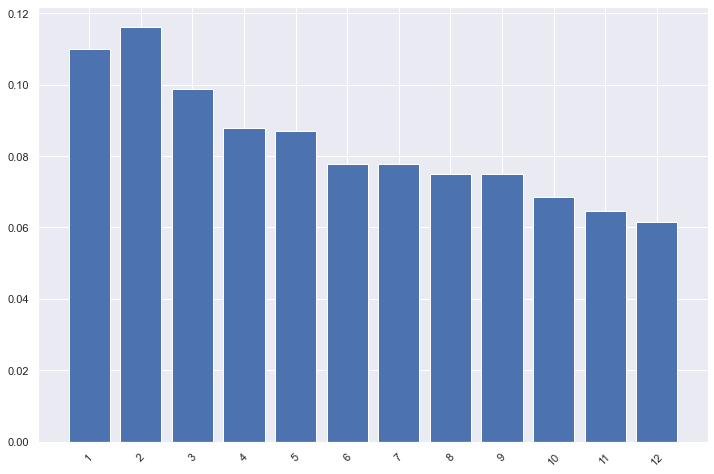

In [9]:
plot_info = df_clean['dob'].dt.month.value_counts(normalize=True).sort_index()
plt.figure(figsize=(12,8))
plt.bar(height=plot_info,x=plot_info.index.astype(str))
plt.xticks(rotation=45)
plt.show()

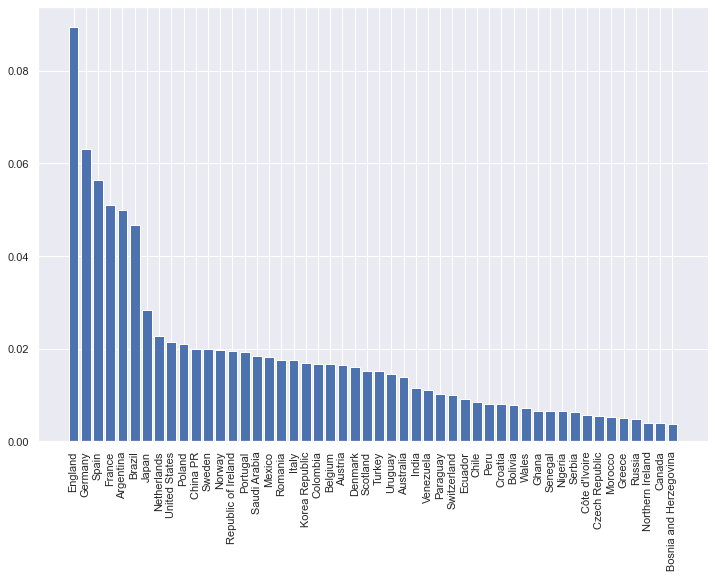

In [10]:
plot_info = df_clean['nationality_name'].value_counts(normalize=True).sort_values(ascending=False).head(50)
plt.figure(figsize=(12,8))
plt.bar(height=plot_info,x=plot_info.index.astype(str))
plt.xticks(rotation=90)
plt.show()

In [11]:
leag_count = df.groupby(['league_name']).agg({'sofifa_id':'count','club_name':'nunique'})
leag_count['ratio'] = leag_count['sofifa_id']/leag_count['club_name']
leag_count

,sofifa_id,club_name,ratio
league_name,,,
Argentina Primera División,727,26,27.961538
Australian Hyundai A-League,277,12,23.083333
Austrian Football Bundesliga,330,12,27.500000
Belgian Jupiler Pro League,488,18,27.111111
Campeonato Brasileiro Série A,360,18,20.000000
Chilian Campeonato Nacional,155,6,25.833333
Chinese Super League,446,16,27.875000
Colombian Liga Postobón,191,8,23.875000
Croatian Prva HNL,56,2,28.000000


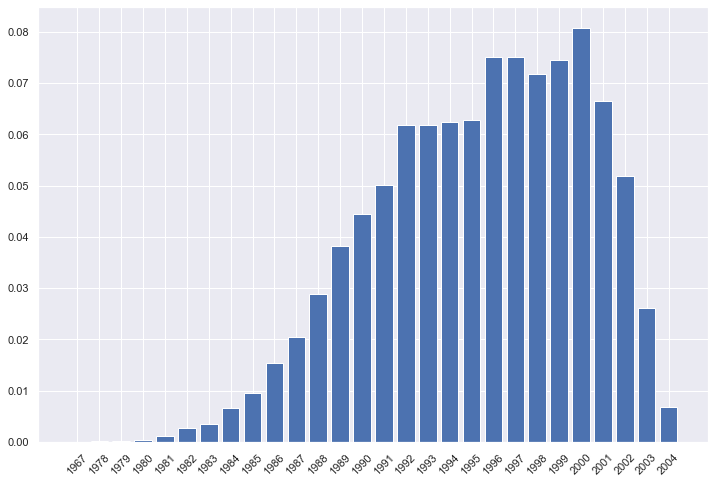

In [12]:
plot_info = df_clean['dob'].dt.to_period('Y').value_counts(normalize=True).sort_index()
plt.figure(figsize=(12,8))
plt.bar(height=plot_info,x=plot_info.index.astype(str))
plt.xticks(rotation=45)
plt.show()

In [13]:
df_clean[df_clean['dob'].dt.year==1967]

,sofifa_id,short_name,player_positions,club_position,overall,potential,age,dob,nationality_name,real_face
16209,254704,K. Miura,ST,RES,59,59,54,1967-02-26,Japan,No


> Wow! Mr. Miura is a 54 y.o. professional player! That's quite impressive!!

In [14]:
df_clean.describe(include='all').T

/var/folders/0n/nzdlc6ks5bscx2hwcwjfkg8r0000gn/T/ipykernel_3346/1574591537.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_clean.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
sofifa_id,19239.0,NaN,NaN,NaN,NaT,NaT,231468.086959,27039.717497,41.0,214413.5,236543.0,253532.5,264640.0
short_name,19239,18145,J. Rodríguez,13,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
player_positions,19239,674,CB,2423,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
club_position,19178,29,SUB,8299,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
overall,19239.0,NaN,NaN,NaN,NaT,NaT,65.772182,6.880232,47.0,61.0,66.0,70.0,93.0
potential,19239.0,NaN,NaN,NaN,NaT,NaT,71.07937,6.086213,49.0,67.0,71.0,75.0,95.0
age,19239.0,NaN,NaN,NaN,NaT,NaT,25.210822,4.748235,16.0,21.0,25.0,29.0,54.0
dob,19239,6312,1992-02-29 00:00:00,125,1967-02-26,2004-09-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nationality_name,19239,163,England,1719,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
real_face,19239,2,No,17019,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


> Given the results above the only field with missing values is club_position, but given that we will most likely use player_position (with some prep on it), we don't need to do any missing treatment.

In [15]:
df_clean['player_positions'].value_counts().head(20)

CB         2423
GK         2132
ST         1770
CDM, CM     953
CM          726
CM, CDM     687
LB          616
RB          576
CB, RB      295
CDM         294
CAM, CM     249
CB, LB      232
CAM         219
LM          206
LB, LM      206
CM, CAM     203
CB, CDM     202
RM          196
RM, LM      196
LM, RM      168
Name: player_positions, dtype: int64

> We will use only the first position as this is the one preferred by player. As we can see, that position can be -1 (player only has 1 preferred position), 2 (ST, CB. GK, etc.) or 3 (CDM, CAM). This can be done considering ',' the logic to split the string and then grab the first value of the resulting list.

In [16]:
end_first_position = df_clean['player_positions'].str.find(',')
end_first_position.value_counts().sort_index()

-1    9430
 2    7199
 3    2610
Name: player_positions, dtype: int64

In [17]:
df_clean['preferred_position'] = df_clean['player_positions'].str.split(',').str.get(0)

In [18]:
df_clean['preferred_position'].value_counts()

CB     3339
ST     2608
CM     2173
GK     2132
CDM    1665
LB     1360
RB     1346
CAM    1151
RM     1028
LM     1016
RW      495
LW      435
RWB     178
LWB     171
CF      142
Name: preferred_position, dtype: int64

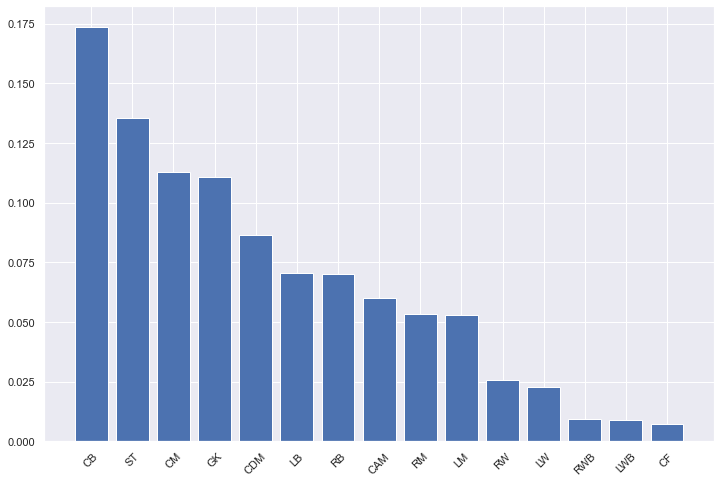

In [19]:
plot_info = df_clean['preferred_position'].value_counts(normalize=True).sort_values(ascending=False)
plt.figure(figsize=(12,8))
plt.bar(height=plot_info,x=plot_info.index.astype(str))
plt.xticks(rotation=45)
plt.show()

> Side question, is the club's position the same as the preferred by the players?

In [20]:
(df_clean['preferred_position']==df_clean['club_position']).value_counts(normalize=True)*100

False    82.852539
True     17.147461
dtype: float64

> Ok. According to FIFA db, only 17% of the players actually play on their preferred position. Let's get back to it.

## Defining a top player based on overall rating

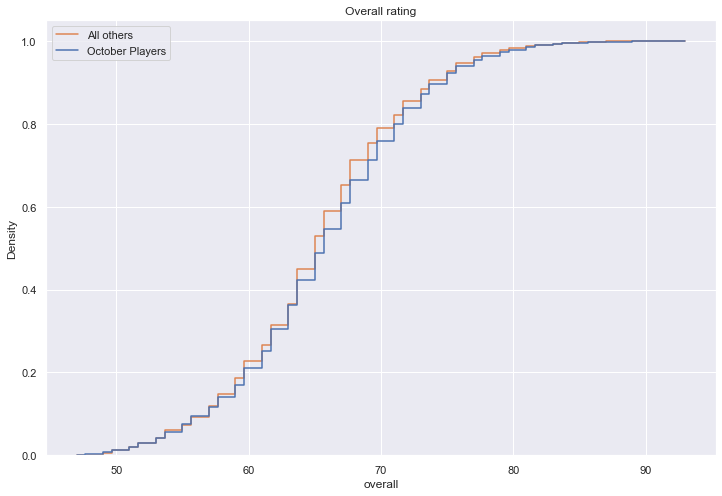

In [21]:
plt.figure(figsize=(12,8))
sns.histplot(data= df_clean,x='overall' ,hue=(df_clean['dob'].dt.month==10),
            cumulative=True,stat='density',common_norm=False,element='step',fill=False,
            color=['#ff1dce','#1a9988'],label='Overall rating')
plt.legend(['All others','October Players'])
plt.title('Overall rating')
plt.show()

> Hard to read anything directly from distribution

In [22]:
df_clean['overall'].groupby(df_clean['dob'].dt.month==10).describe(percentiles=[0.90,0.95,0.97,0.98,0.99,0.999])

,count,mean,std,min,50%,90%,95%,97%,98%,99%,99.9%,max
dob,,,,,,,,,,,,
False,17920.0,65.802455,6.892260,47.0,66.0,75.0,77.0,79.0,81.00,83.0,89.000,93.0
True,1319.0,65.360879,6.703691,48.0,65.0,74.0,77.0,78.0,79.64,82.0,86.682,89.0


> Apparently there is no evidence of October players (True) being better than other players, but let's say a top player is in the 1% highest overall ratings. Do October players have a higher chance to be among top 1%?

In [23]:
top_1pct = df_clean['overall'].quantile(0.99)
df_clean['target'] = np.where(df_clean['overall']>=top_1pct,1,0)
df_clean['target'].value_counts(normalize=True)

0    0.989656
1    0.010344
Name: target, dtype: float64

In [24]:
pd.crosstab(df_clean['dob'].dt.month==10,df_clean['target'],normalize='index')

target,0,1
dob,,
False,0.989621,0.010379
True,0.990144,0.009856


In [25]:
df_clean[df_clean['overall']<=83].head(15)

,sofifa_id,short_name,player_positions,club_position,overall,potential,age,dob,nationality_name,real_face,preferred_position,target
140,135507,Fernandinho,"CDM, CB",SUB,83,83,36,1985-05-04,Brazil,Yes,CDM,1
141,169416,C. Vela,"RW, LW, CAM",RW,83,83,32,1989-03-01,Mexico,Yes,RW,1
142,177413,A. Witsel,"CDM, CM",SUB,83,83,32,1989-01-12,Belgium,Yes,CDM,1
143,178750,Sergio Asenjo,GK,SUB,83,83,32,1989-06-28,Spain,No,GK,1
144,179645,S. Kjær,CB,RCB,83,83,32,1989-03-26,Denmark,Yes,CB,1
145,180930,E. Džeko,ST,RS,83,83,35,1986-03-17,Bosnia and Herzegovina,Yes,ST,1
146,183907,J. Boateng,CB,RES,83,83,32,1988-09-03,Germany,Yes,CB,1
147,184087,T. Alderweireld,CB,NaN,83,83,32,1989-03-02,Belgium,Yes,CB,1
148,184432,Azpilicueta,"CB, RWB",RWB,83,83,31,1989-08-28,Spain,Yes,CB,1
149,187961,Paulinho,"CM, CAM, CDM",LCM,83,83,32,1988-07-25,Brazil,Yes,CM,1


## Prepare categorical feature

In [26]:
df_clean.head(2)

,sofifa_id,short_name,player_positions,club_position,overall,potential,age,dob,nationality_name,real_face,preferred_position,target
0,158023,L. Messi,"RW, ST, CF",RW,93,93,34,1987-06-24,Argentina,Yes,RW,1
1,188545,R. Lewandowski,ST,ST,92,92,32,1988-08-21,Poland,Yes,ST,1


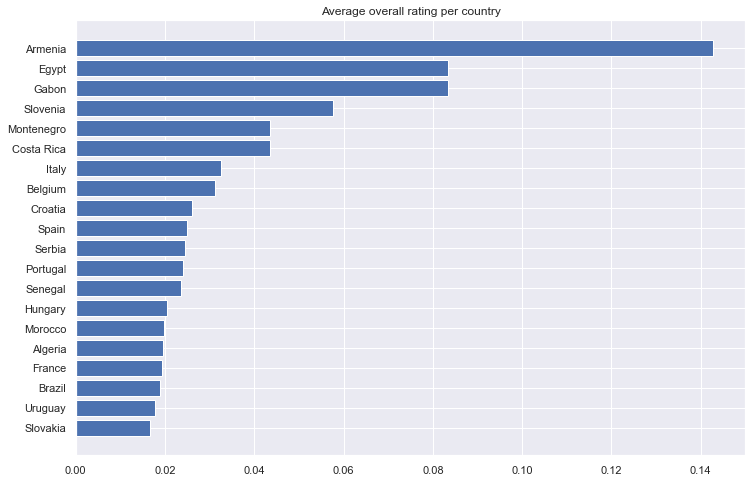

In [27]:
avg_rating_country = df_clean.groupby('nationality_name')['target'].mean().sort_values(ascending=False).head(20).sort_values()

plt.figure(figsize=(12,8))
plt.barh(avg_rating_country.index,width=avg_rating_country.values)
plt.title('Average overall rating per country')
plt.show()

In [28]:
print(df_clean['nationality_name'].nunique())
(df_clean.groupby('nationality_name')['target'].mean()==0).value_counts(normalize=True)

163


True     0.748466
False    0.251534
Name: target, dtype: float64

> Here we can see that while some have no player on top 1pct, other have way too many. Is Armenia the best national team by far? That might be an effect of low number of players from that country, so EA decided to include only the best players in FIFA. Also, 25% of the 163 countries do not have any top player, but it is possible since football is not the main sport in several countries.

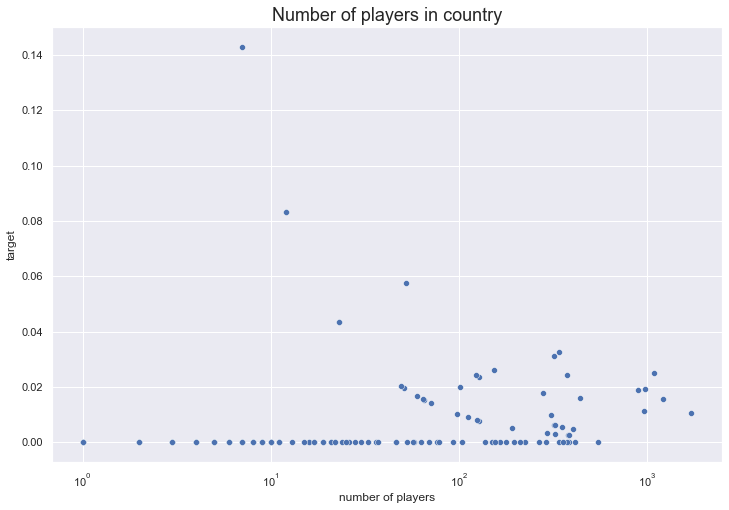

In [29]:
country_plot = df_clean.groupby('nationality_name').agg({'target':'mean','sofifa_id':'count'})

plt.figure(figsize=(12,8))
sns.scatterplot(data=country_plot,x='sofifa_id',y='target')
plt.xscale('log')
plt.xlabel('number of players')
plt.title('Number of players in country',fontsize=18)
plt.show()

In [30]:
df_clean[df_clean['nationality_name']=='Armenia'].sort_values('overall',ascending=False)

,sofifa_id,short_name,player_positions,club_position,overall,potential,age,dob,nationality_name,real_face,preferred_position,target
156,192883,H. Mkhitaryan,"CF, RM, RW",LM,83,83,32,1989-01-21,Armenia,Yes,CF,1
2168,218534,S. Adamyan,"CAM, ST, LM",SUB,74,74,28,1993-05-23,Armenia,No,CAM,0
4049,206423,V. Haroyan,CB,RCB,71,72,28,1992-08-24,Armenia,No,CB,0
5173,235989,N. Briasco,"ST, RW, RM",LS,70,75,25,1996-02-29,Armenia,No,ST,0
8810,198178,A. Calisir,CB,LCB,66,66,31,1990-06-13,Armenia,No,CB,0
10374,232657,M. Guevgeozián,ST,SUB,65,65,35,1986-05-10,Armenia,No,ST,0
18832,263399,M. Nazaretian,GK,RES,52,61,20,2001-06-01,Armenia,No,GK,0


> As we suspected, the low number of players in a country is correlated with both extremes: no top 1% player and too many top 1% players. Armenia 7 players in total and one of them is among the top 1%: Mkhitaryan.

In [31]:
country_plot[country_plot['target']==0].sort_values(by=['sofifa_id'],ascending=False)

,target,sofifa_id
nationality_name,,
Japan,0.0,546
United States,0.0,413
China PR,0.0,385
Republic of Ireland,0.0,374
Saudi Arabia,0.0,355
...,...,...
Indonesia,0.0,1
Korea DPR,0.0,1
Kyrgyzstan,0.0,1


In [32]:
country_plot.sort_values('sofifa_id',ascending=False)

,target,sofifa_id
nationality_name,,
England,0.010471,1719
Germany,0.015651,1214
Spain,0.024862,1086
France,0.019388,980
Argentina,0.011458,960
...,...,...
Guam,0.000000,1
Mauritius,0.000000,1
Indonesia,0.000000,1


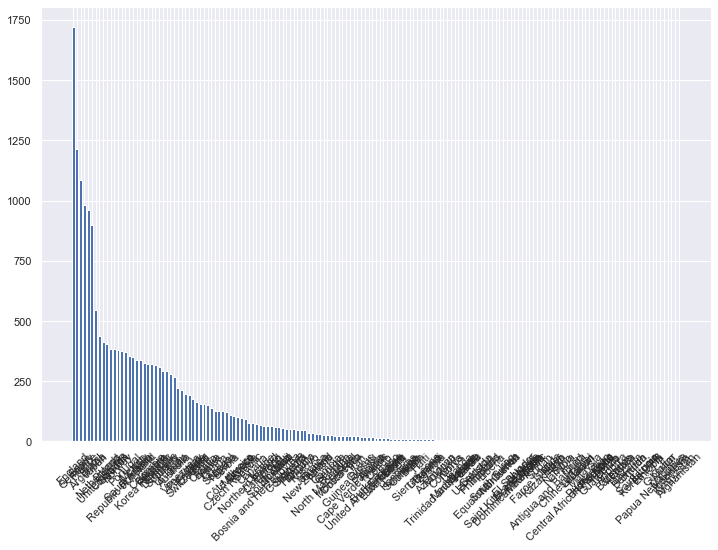

In [33]:
plt.figure(figsize=(12,8))
plt.bar(height=country_plot['sofifa_id'].sort_values(ascending=False).values,x=country_plot['sofifa_id'].sort_values(ascending=False).index)
plt.xticks(rotation=45)
plt.show()

> Back to categorisation of string features. We can see that the country with the highest number of players and no one among the top 1% is Japan with 546 players. Let's set all countries with less than 600 players a big common group.

In [34]:
df_clean['nationality_grouped'] = np.where(df_clean['nationality_name'].isin(country_plot[country_plot['sofifa_id']<600].index),
                                           'other countries',df_clean['nationality_name'])
pd.concat([pd.crosstab(df_clean['nationality_grouped'],df_clean['target']),
           df_clean.groupby('nationality_grouped')['target'].mean()],axis=1)

,0,1,target
nationality_grouped,,,
Argentina,949,11,0.011458
Brazil,880,17,0.018952
England,1701,18,0.010471
France,961,19,0.019388
Germany,1195,19,0.015651
Spain,1059,27,0.024862
other countries,12295,88,0.007107


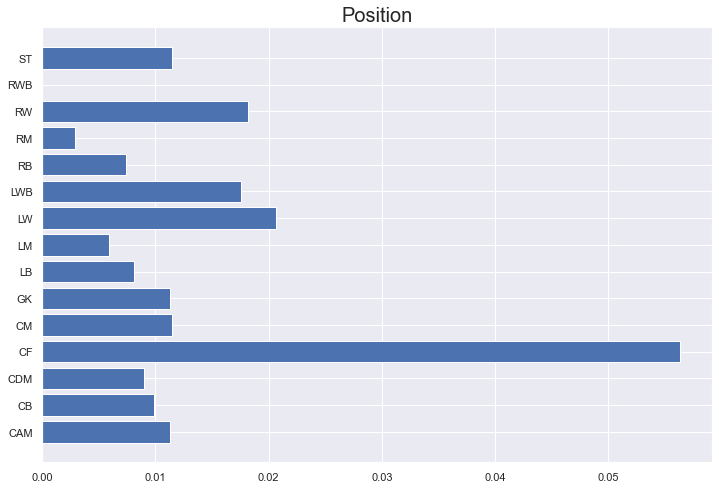

In [35]:
plt.figure(figsize=(12,8))
plt.barh(df_clean.groupby('preferred_position')['target'].mean().index,
         df_clean.groupby('preferred_position')['target'].mean().values)
plt.title('Position', fontsize=20)
plt.show()

> Clearly there is strong correlation between player's position and the chance of being among top 1%. Given that right wing back is a position that apparently never have a top player, I'll group it with RB so we don't have problems with estimation

In [36]:
age_plot = df_clean.groupby(pd.qcut(df_clean['age'],q=15,duplicates='drop'))['target'].mean()

In [37]:
age_plot

age
(15.999, 19.0]    0.000000
(19.0, 20.0]      0.000726
(20.0, 21.0]      0.002586
(21.0, 22.0]      0.005533
(22.0, 23.0]      0.003605
(23.0, 24.0]      0.007628
(24.0, 25.0]      0.010760
(25.0, 26.0]      0.011696
(26.0, 27.0]      0.015833
(27.0, 28.0]      0.018601
(28.0, 29.0]      0.017827
(29.0, 31.0]      0.017961
(31.0, 33.0]      0.024501
(33.0, 54.0]      0.022200
Name: target, dtype: float64

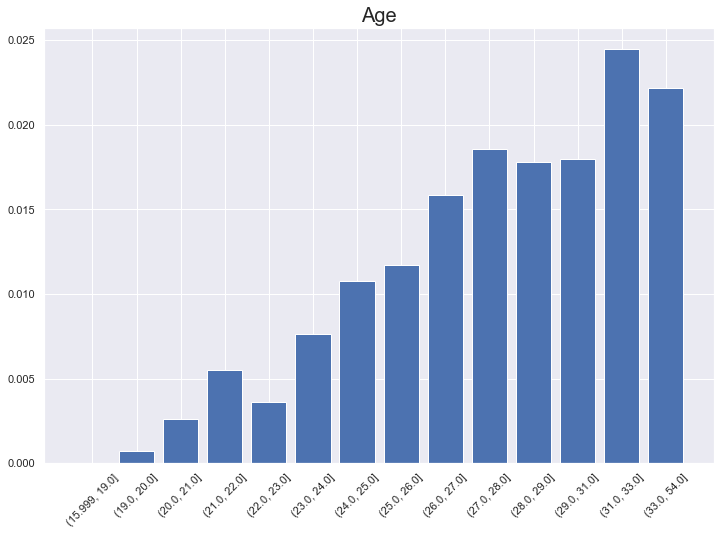

In [38]:
age_plot = df_clean.groupby(pd.qcut(df_clean['age'],q=15,duplicates='drop'))['target'].mean()
plt.figure(figsize=(12,8))
plt.bar(x=age_plot.index.astype('str'),height=age_plot)
plt.xticks(rotation=45)
plt.title('Age', fontsize=20)
plt.show()

> Interestingly, the older the player, the higher the chance to be a top player. I wonder if that's an effect of a "proven-record" that the player at least was good a few years back and that weights on the overall rating. After all, usually fooballers reach their peak at the age of 27-30, not after.

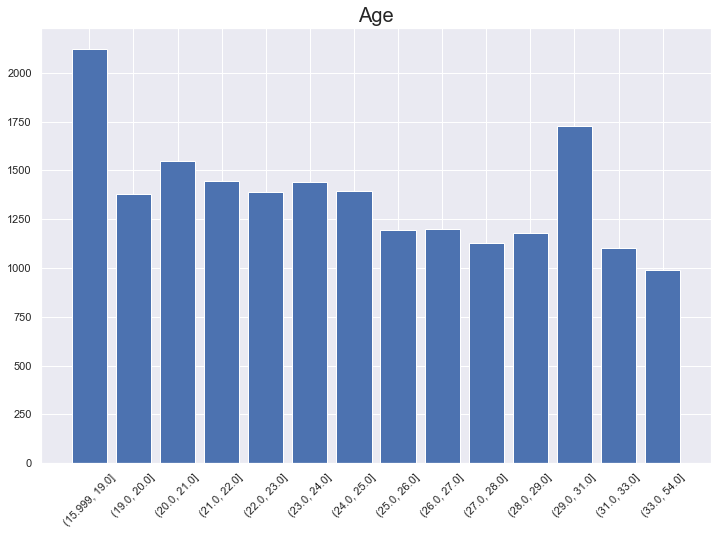

In [39]:
age_plot = df_clean.groupby(pd.qcut(df_clean['age'],q=15,duplicates='drop'))['target'].count()
plt.figure(figsize=(12,8))
plt.bar(x=age_plot.index.astype('str'),height=age_plot)
plt.xticks(rotation=45)
plt.title('Age', fontsize=20)
plt.show()

In [66]:
def feature_transform(_df):
    '''
    Function creates three treated features:
        preferred position of the player (substitutes RWB for RB),
        caps age to 1% & 99% percentiles to avoid the impact of outliers and transform it,
        creates the flag for players born in October
    :param _df: DataFrame with features to be used in modelling and data analysis
    :return: Same DataFrame with added columns
    '''
    _df['preferred_position'] = np.where(_df['preferred_position']=='RWB','RB',_df['preferred_position'])
    _df['capped_age'] = _df['age'].clip(_df['age'].quantile(0.01),_df['age'].quantile(0.99))
    _df['feat_age'] = (_df['capped_age']-_df['capped_age'].mean())/_df['capped_age'].std()
    _df['october_player'] = np.where(_df['dob'].dt.month==10,1,0)
    return _df

In [67]:
df_clean = feature_transform(_df=df_clean)

In [41]:
df_model = pd.concat([df_clean[['target','feat_age','october_player']],
           pd.get_dummies(df_clean['nationality_grouped'],prefix='feat_nationality'),
           pd.get_dummies(df_clean['preferred_position'],prefix='feat_position')],
          axis=1)

In [42]:
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
target,19239.0,1.034357e-02,0.101179,0.000000,0.000000,0.000000,0.000000,1.000000
feat_age,19239.0,3.072777e-16,1.000000,-1.741313,-0.891747,-0.042182,0.807383,2.506513
october_player,19239.0,6.855866e-02,0.252709,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_Argentina,19239.0,4.989864e-02,0.217741,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_Brazil,19239.0,4.662404e-02,0.210838,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_England,19239.0,8.934976e-02,0.285255,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_France,19239.0,5.093820e-02,0.219877,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_Germany,19239.0,6.310099e-02,0.243151,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_Spain,19239.0,5.644784e-02,0.230790,0.000000,0.000000,0.000000,0.000000,1.000000
feat_nationality_other countries,19239.0,6.436405e-01,0.478936,0.000000,0.000000,1.000000,1.000000,1.000000


> Let's calculate the scaler for age in a separate sample to avoid information leak.

## Train model and analyse effect of October players

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [44]:
X_train,X_test,y_train,y_test = train_test_split(df_model.drop(columns='target'),df_model['target'],test_size=0.3,random_state=42)

In [45]:
model_oct = LogisticRegression(penalty='l1',random_state=42,solver='saga',max_iter=100)

In [46]:
model_oct.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [47]:
coeffs = pd.DataFrame(model_oct.coef_.T,columns= ['coefficients'],index = X_train.columns)
coeffs.reset_index()

,index,coefficients
0,feat_age,0.705292
1,october_player,0.000000
2,feat_nationality_Argentina,-1.082197
3,feat_nationality_Brazil,0.000000
4,feat_nationality_England,-0.350145
5,feat_nationality_France,0.087075
6,feat_nationality_Germany,0.000000
7,feat_nationality_Spain,0.371553
8,feat_nationality_other countries,-0.827625
9,feat_position_CAM,0.000000


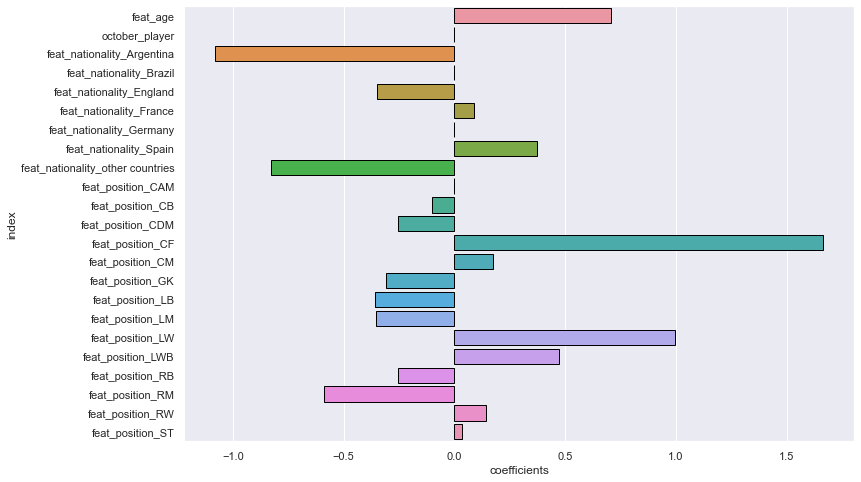

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(data=coeffs.reset_index(), x="coefficients", y="index",
            errorbar=("pi", 50), # capsize=.4, errcolor=".5",
            linewidth=1, edgecolor=".0"#, facecolor=(0, 0, 0, 0),
            )

plt.show()

> Ok. As one could probably think, being born in October doesn't seem to be determinant to be a top player conditioned to other characteristics. However, it is logical to think that given the structure of age division in youth football teams, kids born towards the end of the year would need to stand out consistently to be among the first team. Therefore, being born in the second half (H2) of the year could show the effect of this adverse selection.

## Train model and analyse effect of players born in H2

In [49]:
df_clean['h2_player'] = np.where(df_clean['dob'].dt.month>=7,1,0)
df_model = pd.concat([df_clean[['target','feat_age','h2_player']],
           pd.get_dummies(df_clean['nationality_grouped'],prefix='feat_nationality'),
           pd.get_dummies(df_clean['preferred_position'],prefix='feat_position')],
          axis=1)
df_model.head()

,target,feat_age,h2_player,feat_nationality_Argentina,feat_nationality_Brazil,feat_nationality_England,feat_nationality_France,feat_nationality_Germany,feat_nationality_Spain,feat_nationality_other countries,...,feat_position_CM,feat_position_GK,feat_position_LB,feat_position_LM,feat_position_LW,feat_position_LWB,feat_position_RB,feat_position_RM,feat_position_RW,feat_position_ST
0,1,1.869339,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1.444557,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2.294122,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.807383,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1.019774,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [50]:
X_train,X_test,y_train,y_test = train_test_split(df_model.drop(columns='target'),df_model['target'],test_size=0.3,random_state=42)
model_h2 = LogisticRegression(penalty='l1',random_state=42,solver='saga',max_iter=100)
model_h2.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [51]:
coeffs = (pd.DataFrame(model_h2.coef_.T,columns= ['coefficients'],index = X_train.columns))
coeffs.reset_index()

,index,coefficients
0,feat_age,0.705500
1,h2_player,0.013365
2,feat_nationality_Argentina,-1.083138
3,feat_nationality_Brazil,0.000000
4,feat_nationality_England,-0.352521
5,feat_nationality_France,0.085746
6,feat_nationality_Germany,0.000000
7,feat_nationality_Spain,0.370479
8,feat_nationality_other countries,-0.829061
9,feat_position_CAM,0.000000


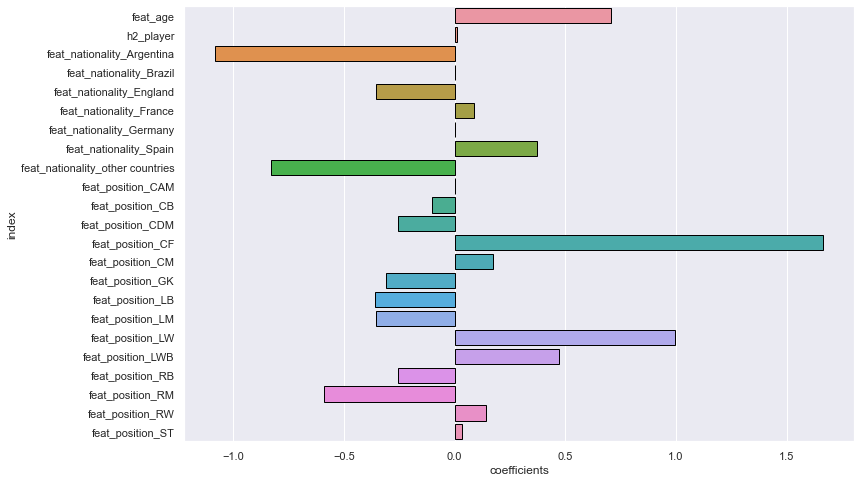

In [52]:
plt.figure(figsize=(12,8))
sns.barplot(data=(coeffs).reset_index(), x="coefficients", y="index",
            errorbar=("pi", 50), # capsize=.4, errcolor=".5",
            linewidth=1, edgecolor=".0"#, facecolor=(0, 0, 0, 0),
            )

plt.show()

In [53]:
#odds_effect
((np.exp(coeffs))-1)*100

,coefficients
feat_age,102.485820
h2_player,1.345521
feat_nationality_Argentina,-66.146829
feat_nationality_Brazil,0.000000
feat_nationality_England,-29.708587
feat_nationality_France,8.952960
feat_nationality_Germany,0.000000
feat_nationality_Spain,44.842839
feat_nationality_other countries,-56.354124
feat_position_CAM,0.000000


> Interesting.Being born in H2 doesn't have such a big impact. In fact, it shows an increase of 1.3% in the odds of being a top player. But that's better than nothing. One question can be raised here: if this adverse selection effect exists, wouldn't it be somewhat linear throughout the year. So instead of H1 vs H2, what would be the effect of month number?

## Train model and month number effect

In [54]:
df_clean['month_number'] = df_clean['dob'].dt.month
df_clean['feat_month_number'] = (df_clean['month_number']-df_clean['month_number'].mean())/df_clean['month_number'].std()
df_model = pd.concat([df_clean[['target','feat_age','feat_month_number']],
           pd.get_dummies(df_clean['nationality_grouped'],prefix='feat_nationality'),
           pd.get_dummies(df_clean['preferred_position'],prefix='feat_position')],
          axis=1)
df_model.head()

,target,feat_age,feat_month_number,feat_nationality_Argentina,feat_nationality_Brazil,feat_nationality_England,feat_nationality_France,feat_nationality_Germany,feat_nationality_Spain,feat_nationality_other countries,...,feat_position_CM,feat_position_GK,feat_position_LB,feat_position_LM,feat_position_LW,feat_position_LWB,feat_position_RB,feat_position_RM,feat_position_RW,feat_position_ST
0,1,1.869339,0.044919,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,1.444557,0.624915,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,1,2.294122,-1.115074,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.807383,-1.115074,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,1,1.019774,0.044919,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [55]:
X_train,X_test,y_train,y_test = train_test_split(df_model.drop(columns='target'),df_model['target'],test_size=0.3,random_state=42)
model_month = LogisticRegression(penalty='l1',random_state=42,solver='saga',max_iter=100)
model_month.fit(X_train,y_train)

LogisticRegression(penalty='l1', random_state=42, solver='saga')

In [56]:
coeffs = (pd.DataFrame(model_month.coef_.T,columns= ['coefficients'],index = X_train.columns))
coeffs.reset_index()

,index,coefficients
0,feat_age,0.705332
1,feat_month_number,0.009418
2,feat_nationality_Argentina,-1.083968
3,feat_nationality_Brazil,0.000000
4,feat_nationality_England,-0.354233
5,feat_nationality_France,0.084410
6,feat_nationality_Germany,0.000000
7,feat_nationality_Spain,0.369273
8,feat_nationality_other countries,-0.830253
9,feat_position_CAM,0.000000


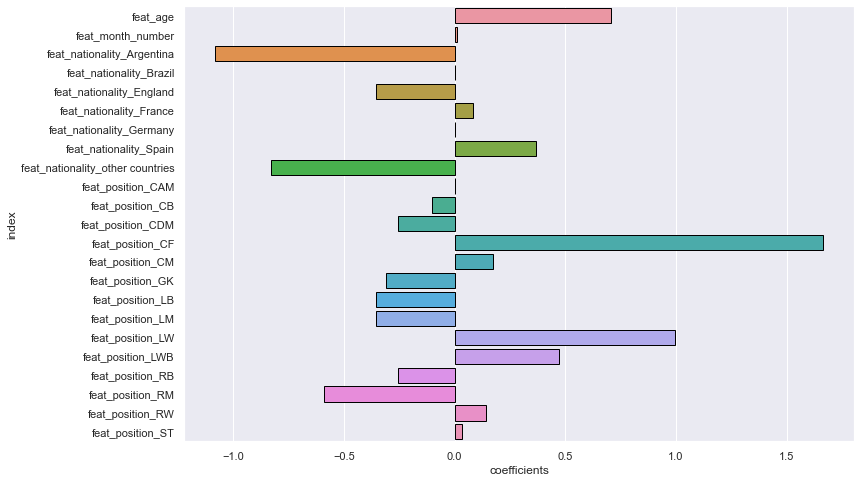

In [57]:
plt.figure(figsize=(12,8))
sns.barplot(data=(coeffs).reset_index(), x="coefficients", y="index",
            errorbar=("pi", 50), # capsize=.4, errcolor=".5",
            linewidth=1, edgecolor=".0"#, facecolor=(0, 0, 0, 0),
            )

plt.show()

In [58]:
np.exp(coeffs.loc['feat_month_number'].values[0]*(df_clean.groupby('month_number')['feat_month_number'].mean()-df_clean.groupby('month_number')['feat_month_number'].mean().min()))-1

month_number
1     0.000000
2     0.002735
3     0.005477
4     0.008227
5     0.010985
6     0.013750
7     0.016522
8     0.019303
9     0.022090
10    0.024886
11    0.027689
12    0.030499
Name: feat_month_number, dtype: float64

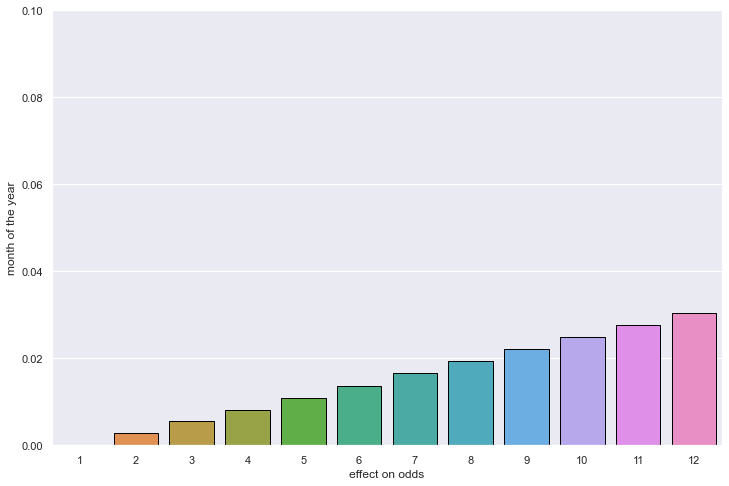

In [59]:
month_effect = np.exp(coeffs.loc['feat_month_number'].values[0]*(df_clean.groupby('month_number')['feat_month_number'].mean()-df_clean.groupby('month_number')['feat_month_number'].mean().min()))-1

plt.figure(figsize=(12,8))
sns.barplot(data=(month_effect).reset_index(), y="feat_month_number", x="month_number",
            errorbar=("pi", 50), # capsize=.4, errcolor=".5",
            linewidth=1, edgecolor=".0"#, facecolor=(0, 0, 0, 0),
            )
plt.xlabel('effect on odds')
plt.ylabel('month of the year')
plt.ylim(0,0.1)
plt.show()

> So in the end, that effect is still small: an increase in the odds of being a top player of 3% would be estimated if the player was born in December vs a player born in January of the same year.

## How unlikely was Pele and Maradona to be a top player according to those models

For this exercise, I'll consider Pele's and Maradona's age when they were at the top of their career: 1970 and 1986 Mexico's World Cups (is this another pattern emerging?). Their positions are set as CF and CAM.

In [60]:
pele_proxy_month = pd.Series({  'feat_age': 1.019774,
                               'feat_month_number': 1.204911,
                               'feat_nationality_Argentina': 0.000000,
                               'feat_nationality_Brazil': 1.000000,
                               'feat_nationality_England': 0.000000,
                               'feat_nationality_France': 0.000000,
                               'feat_nationality_Germany': 0.000000,
                               'feat_nationality_Spain': 0.000000,
                               'feat_nationality_other countries': 0.000000,
                               'feat_position_CAM': 0.000000,
                               'feat_position_CB': 0.000000,
                               'feat_position_CDM': 0.000000,
                               'feat_position_CF': 1.000000,
                               'feat_position_CM': 0.000000,
                               'feat_position_GK': 0.000000,
                               'feat_position_LB': 0.000000,
                               'feat_position_LM': 0.000000,
                               'feat_position_LW': 0.000000,
                               'feat_position_LWB': 0.000000,
                               'feat_position_RB': 0.0,
                               'feat_position_RM': 0.0,
                               'feat_position_RW': 0.0,
                               'feat_position_ST': 0.0})

pele_proxy_h2 = pd.Series({  'feat_age': 1.019774,
                               'h2_player': 1.0,
                               'feat_nationality_Argentina': 0.000000,
                               'feat_nationality_Brazil': 1.000000,
                               'feat_nationality_England': 0.000000,
                               'feat_nationality_France': 0.000000,
                               'feat_nationality_Germany': 0.000000,
                               'feat_nationality_Spain': 0.000000,
                               'feat_nationality_other countries': 0.000000,
                               'feat_position_CAM': 0.000000,
                               'feat_position_CB': 0.000000,
                               'feat_position_CDM': 0.000000,
                               'feat_position_CF': 1.000000,
                               'feat_position_CM': 0.000000,
                               'feat_position_GK': 0.000000,
                               'feat_position_LB': 0.000000,
                               'feat_position_LM': 0.000000,
                               'feat_position_LW': 0.000000,
                               'feat_position_LWB': 0.000000,
                               'feat_position_RB': 0.0,
                               'feat_position_RM': 0.0,
                               'feat_position_RW': 0.0,
                               'feat_position_ST': 0.0})

pele_proxy_oct = pd.Series({  'feat_age': 1.019774,
                               'october_player': 1.0,
                               'feat_nationality_Argentina': 0.000000,
                               'feat_nationality_Brazil': 1.000000,
                               'feat_nationality_England': 0.000000,
                               'feat_nationality_France': 0.000000,
                               'feat_nationality_Germany': 0.000000,
                               'feat_nationality_Spain': 0.000000,
                               'feat_nationality_other countries': 0.000000,
                               'feat_position_CAM': 0.000000,
                               'feat_position_CB': 0.000000,
                               'feat_position_CDM': 0.000000,
                               'feat_position_CF': 1.000000,
                               'feat_position_CM': 0.000000,
                               'feat_position_GK': 0.000000,
                               'feat_position_LB': 0.000000,
                               'feat_position_LM': 0.000000,
                               'feat_position_LW': 0.000000,
                               'feat_position_LWB': 0.000000,
                               'feat_position_RB': 0.0,
                               'feat_position_RM': 0.0,
                               'feat_position_RW': 0.0,
                               'feat_position_ST': 0.0})


maradona_proxy_month = pd.Series({  'feat_age': 0.170209,
                               'feat_month_number': 1.204911,
                               'feat_nationality_Argentina': 1.000000,
                               'feat_nationality_Brazil': 0.000000,
                               'feat_nationality_England': 0.000000,
                               'feat_nationality_France': 0.000000,
                               'feat_nationality_Germany': 0.000000,
                               'feat_nationality_Spain': 0.000000,
                               'feat_nationality_other countries': 0.000000,
                               'feat_position_CAM': 1.000000,
                               'feat_position_CB': 0.000000,
                               'feat_position_CDM': 0.000000,
                               'feat_position_CF': 0.000000,
                               'feat_position_CM': 0.000000,
                               'feat_position_GK': 0.000000,
                               'feat_position_LB': 0.000000,
                               'feat_position_LM': 0.000000,
                               'feat_position_LW': 0.000000,
                               'feat_position_LWB': 0.000000,
                               'feat_position_RB': 0.0,
                               'feat_position_RM': 0.0,
                               'feat_position_RW': 0.0,
                               'feat_position_ST': 0.0})

maradona_proxy_h2 = pd.Series({  'feat_age': 0.170209,
                               'h2_player': 1.0,
                               'feat_nationality_Argentina': 1.000000,
                               'feat_nationality_Brazil': 0.000000,
                               'feat_nationality_England': 0.000000,
                               'feat_nationality_France': 0.000000,
                               'feat_nationality_Germany': 0.000000,
                               'feat_nationality_Spain': 0.000000,
                               'feat_nationality_other countries': 0.000000,
                               'feat_position_CAM': 1.000000,
                               'feat_position_CB': 0.000000,
                               'feat_position_CDM': 0.000000,
                               'feat_position_CF': 0.000000,
                               'feat_position_CM': 0.000000,
                               'feat_position_GK': 0.000000,
                               'feat_position_LB': 0.000000,
                               'feat_position_LM': 0.000000,
                               'feat_position_LW': 0.000000,
                               'feat_position_LWB': 0.000000,
                               'feat_position_RB': 0.0,
                               'feat_position_RM': 0.0,
                               'feat_position_RW': 0.0,
                               'feat_position_ST': 0.0})

maradona_proxy_oct = pd.Series({  'feat_age': 0.170209,
                               'october_player': 1.0,
                               'feat_nationality_Argentina': 1.000000,
                               'feat_nationality_Brazil': 0.000000,
                               'feat_nationality_England': 0.000000,
                               'feat_nationality_France': 0.000000,
                               'feat_nationality_Germany': 0.000000,
                               'feat_nationality_Spain': 0.000000,
                               'feat_nationality_other countries': 0.000000,
                               'feat_position_CAM': 1.000000,
                               'feat_position_CB': 0.000000,
                               'feat_position_CDM': 0.000000,
                               'feat_position_CF': 0.000000,
                               'feat_position_CM': 0.000000,
                               'feat_position_GK': 0.000000,
                               'feat_position_LB': 0.000000,
                               'feat_position_LM': 0.000000,
                               'feat_position_LW': 0.000000,
                               'feat_position_LWB': 0.000000,
                               'feat_position_RB': 0.0,
                               'feat_position_RM': 0.0,
                               'feat_position_RW': 0.0,
                               'feat_position_ST': 0.0})

In [61]:
proxy_oct = pd.concat([maradona_proxy_oct,pele_proxy_oct],keys=['maradona','pele'],axis=1).T
proxy_h2 = pd.concat([maradona_proxy_h2,pele_proxy_h2],keys=['maradona','pele'],axis=1).T
proxy_month = pd.concat([maradona_proxy_month,pele_proxy_month],keys=['maradona','pele'],axis=1).T

In [62]:
print('H2 model')
pd.DataFrame(model_h2.predict_proba(proxy_h2),index=proxy_h2.index)

H2 model


,0,1
maradona,0.994471,0.005529
pele,0.863286,0.136714


In [63]:
print('October model')
pd.DataFrame(model_oct.predict_proba(proxy_oct),index=proxy_oct.index)

October model


,0,1
maradona,0.994516,0.005484
pele,0.864425,0.135575


In [64]:
print('Month model')
pd.DataFrame(model_month.predict_proba(proxy_month),index=proxy_month.index)

Month model


,0,1
maradona,0.994449,0.005551
pele,0.862771,0.137229


> Since we have the models, why not estimate the probability of Pele (Brazilian, 30 yo, CF) and Maradona (Argentinian, 26 yo, CAM) being top players? We can see that Pele would be 13.5X more likely be a top player in FIFA 22 than average (13.5%/1%), while Maradona would have a chance of 0.5% of being a top player in FIFA 22.
>
> For a matter of comparison, playing as right-winger increases by 15%, as a left-winger increases by 171%, and as a central forward the chances show over a five-fold increase at +429%. By these results, being born in Argentina reduces that chance dramatically cutting it to one-third and being born in Brazil doesn't make a difference. So by analysing FIFA-22 data, the geniuses on the image at the top of this article are deviation from the